# Car Price Prediction of Germany from Autoscout24
AutoScout24 is one of the largest Europe's car market for new and used cars. We've collected car data from 2011 to 2021. It shows basic fields like make, model, mileage, horse power, etc. Link for the dataset https://www.kaggle.com/datasets/ander289386/cars-germany

### 1 Import of Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/autoscout24-germany-dataset.csv')
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [3]:
# Let's find out a bit more about the variables in the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


### 2 Check Missing values

In [4]:
df.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

There are 46405 rows in the dataframe, and 9 variables in total. Of these, 4 are numerical variables (of dtype "int64" or "float64") and 5 are categorical (of dtype "object"). The 'model', 'gear' and 'hp' variables have a few null values, and we shall take care of these by dropping the corresponding rows (we don't expect this to have a big impact since the number of null values is relatively small).

In [5]:
# Numerical columns
num_cols = list(df._get_numeric_data().columns)
print(num_cols)

['mileage', 'price', 'hp', 'year']


In [6]:
# Categorical columns
cat_cols = set(df.columns) - set(num_cols)
print(cat_cols)

{'make', 'model', 'fuel', 'gear', 'offerType'}


### 3 Data Cleaning

#### Replacing the year variable with the age of the vehicles¶
We want to transform the 'year' variable to an 'age' variable representing the age of the car as of now:

In [7]:
from datetime import datetime

# Create a new column: 'age'
df['age'] = datetime.now().year - df['year']

# Drop the 'year' column
df = df.drop('year', axis=1)

# Show the top five rows of the cars dataset
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,12
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,12
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,12
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,12
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,12


In [8]:
# Drop the rows with null values
df = df.dropna()

# Display the total number of null values in the resulting dataframe
df.isna().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
age          0
dtype: int64

In [9]:
# It's also a good idea to drop duplicate rows:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43947 entries, 0 to 46399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    43947 non-null  int64  
 1   make       43947 non-null  object 
 2   model      43947 non-null  object 
 3   fuel       43947 non-null  object 
 4   gear       43947 non-null  object 
 5   offerType  43947 non-null  object 
 6   price      43947 non-null  int64  
 7   hp         43947 non-null  float64
 8   age        43947 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


### 3 Exploring data


In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,mileage,price,hp,age
count,43947.000,43947.000,43947.000,43947.000
mean,72312.581,16546.564,133.625,7.069
std,62173.362,19446.803,75.050,3.120
min,0.000,1100.000,1.000,2.000
25%,21500.000,7490.000,86.000,4.000
50%,61309.000,10990.000,116.000,7.000
75%,106000.000,19490.000,150.000,10.000
max,1111111.000,1199900.000,850.000,12.000


In [13]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.000,12
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.000,12
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.000,12
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.000,12
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.000,12


Let us check the categories of the categorical variables

In [17]:
print("Categories in 'make' variable:  ",end=" ")
print(df['make'].unique())

print("\n")

print("Categories in'model' variable:",end=" " )
print(df['model'].unique())

print("\n")

print("Categories in 'fuel' variable:     ",end=" " )
print(df['fuel'].unique())

print("\n")

print("Categories in 'gear' variable:     ",end=" " )
print(df['gear'].unique())

print("\n")

print("Categories in 'offerType' variable:     ",end=" " )
print(df['offerType'].unique())

print("\n")



Categories in 'make' variable:   ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Mitsubishi' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru' 'Dodge' 'Microcar'
 'Lamborghini' 'Lada' 'Tesla' 'Chrysler' 'McLaren' 'Aston' 'Rolls-Royce'
 'Lancia' 'Abarth' 'DS' 'Daihatsu' 'Ligier' 'Ferrari' 'Aixam' 'Zhidou'
 'Morgan' 'Maybach' 'RAM' 'Alpina' 'Polestar' 'Brilliance' 'Piaggio'
 'FISKER' 'Others' 'Cadillac' 'Iveco' 'Isuzu' 'Corvette' 'Baic' 'DFSK'
 'Estrima' 'Alpine']


Categories in'model' variable: ['316' 'Golf' 'Exeo' 'Megane' '308' 'Auris' 'Scenic' 'Zafira' '3'
 'Transit' 'Meriva' 'E 250' 'Orlando' 'A4' 'Polo' 'Espace' 'Grand Espace'
 'Sedici' 'Corsa' 'Picanto' 'Duster' 'Cross Touran' 'Beetle'
 'Golf Cabriolet' '118' 'Astra' 'Focus' 'One D Countryman'
 'Cooper Club

The so many model which might make our model pretty cumbersome. So, we will remove the makes and models that have few data points in the dataframe.

In [19]:
# Count the values of each distinct make and model in the dataset
make_model_counts = df[['make','model']].value_counts()

# Transform the resulting Pandas series into a dataframe
make_model_counts = pd.DataFrame(make_model_counts)

# Inspect the result
make_model_counts

count
make       model            
Volkswagen Golf         1450
Opel       Corsa        1393
Ford       Fiesta       1221
Opel       Astra        1141
Ford       Focus         948
...                      ...
Baic       Senova X35      1
           BJ20            1
Nissan     Pathfinder      1
Isuzu      D-Max           1
Maserati   GranCabrio      1

[844 rows x 1 columns]

There are some 'make' and 'model' values which has single entry in the entire dataframe. Removing them will not impact any results.

In [20]:
# Reset the index of the dataframe
make_model_counts.reset_index(inplace=True)

# Change the name of the count column to 'count'
make_model_counts.columns = ['make','model','count']

# Inspect the result
make_model_counts

,make,model,count
0,Volkswagen,Golf,1450
1,Opel,Corsa,1393
2,Ford,Fiesta,1221
3,Opel,Astra,1141
4,Ford,Focus,948
...,...,...,...
839,Baic,Senova X35,1
840,Baic,BJ20,1
841,Nissan,Pathfinder,1
842,Isuzu,D-Max,1


We only want to keep car make and model combos that have at least 100 datapoints in the dataframe.

In [21]:
make_model_counts = make_model_counts[make_model_counts['count'] >= 100]
make_model_counts

,make,model,count
0,Volkswagen,Golf,1450
1,Opel,Corsa,1393
2,Ford,Fiesta,1221
3,Opel,Astra,1141
4,Ford,Focus,948
...,...,...,...
104,Skoda,Kodiaq,101
105,Volkswagen,Golf Plus,101
106,Mercedes-Benz,Vito,101
107,Dacia,Logan,100


In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
make_model_counts.describe()

,count
count,109.000
mean,294.982
std,270.694
min,100.000
25%,131.000
50%,196.000
75%,335.000
max,1450.000


We combine make and model information into make+model

In [24]:
make_model_counts['make+model'] = make_model_counts['make'] + make_model_counts['model']
make_model_counts['make+model']

0           VolkswagenGolf
1                OpelCorsa
2               FordFiesta
3                OpelAstra
4                FordFocus
              ...         
104            SkodaKodiaq
105    VolkswagenGolf Plus
106      Mercedes-BenzVito
107             DaciaLogan
108                 Mazda6
Name: make+model, Length: 109, dtype: object

In [26]:
# Make a new column in the cars dataset that combines the make and model for every row
df['make_model'] = df['make'] + df['model']
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age,make_model
0,235000,BMW,316,Diesel,Manual,Used,6800,116.000,12,BMW316
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.000,12,VolkswagenGolf
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.000,12,SEATExeo
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.000,12,RenaultMegane
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.000,12,Peugeot308


In [28]:
# Only keep he make and model combinations in the cars dataframe that appear in the make_model_counts dataframe
df = df[df['make_model'].isin(make_model_counts['make+model'])]
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age,make_model
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.000,12,VolkswagenGolf
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.000,12,RenaultMegane
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.000,12,Peugeot308
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.000,12,ToyotaAuris
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.000,12,RenaultScenic


In [30]:
df.describe()

,mileage,price,hp,age
count,32153.000,32153.000,32153.000,32153.000
mean,72607.111,13136.600,116.755,7.134
std,60405.544,9008.676,47.087,3.049
min,0.000,1100.000,1.000,2.000
25%,23406.000,7190.000,80.000,5.000
50%,62301.000,9999.000,105.000,7.000
75%,105915.000,15770.000,145.000,10.000
max,620000.000,97880.000,450.000,12.000


### 4 Analyzing variables

#### 4.1 Mileage vs Price

In [31]:
df.mileage.describe()

count    32153.000
mean     72607.111
std      60405.544
min          0.000
25%      23406.000
50%      62301.000
75%     105915.000
max     620000.000
Name: mileage, dtype: float64

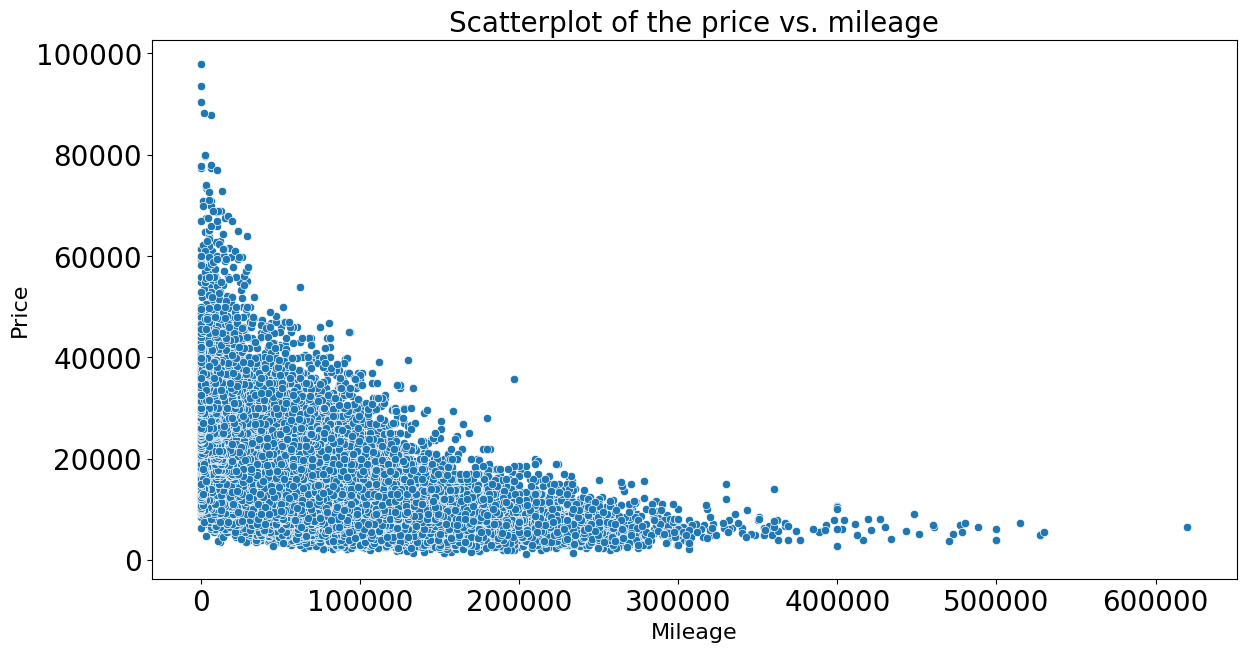

In [32]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = df.mileage, y = df.price)

plt.xlabel('Mileage', fontsize=16);
plt.ylabel('Price', fontsize=16);
plt.title('Scatterplot of the price vs. mileage', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

Observation: The price seems to decrease with mileage as a general trend. This trend is more pronounced at higher values of the mileage variable.

#### 4.2 Make vs Price 

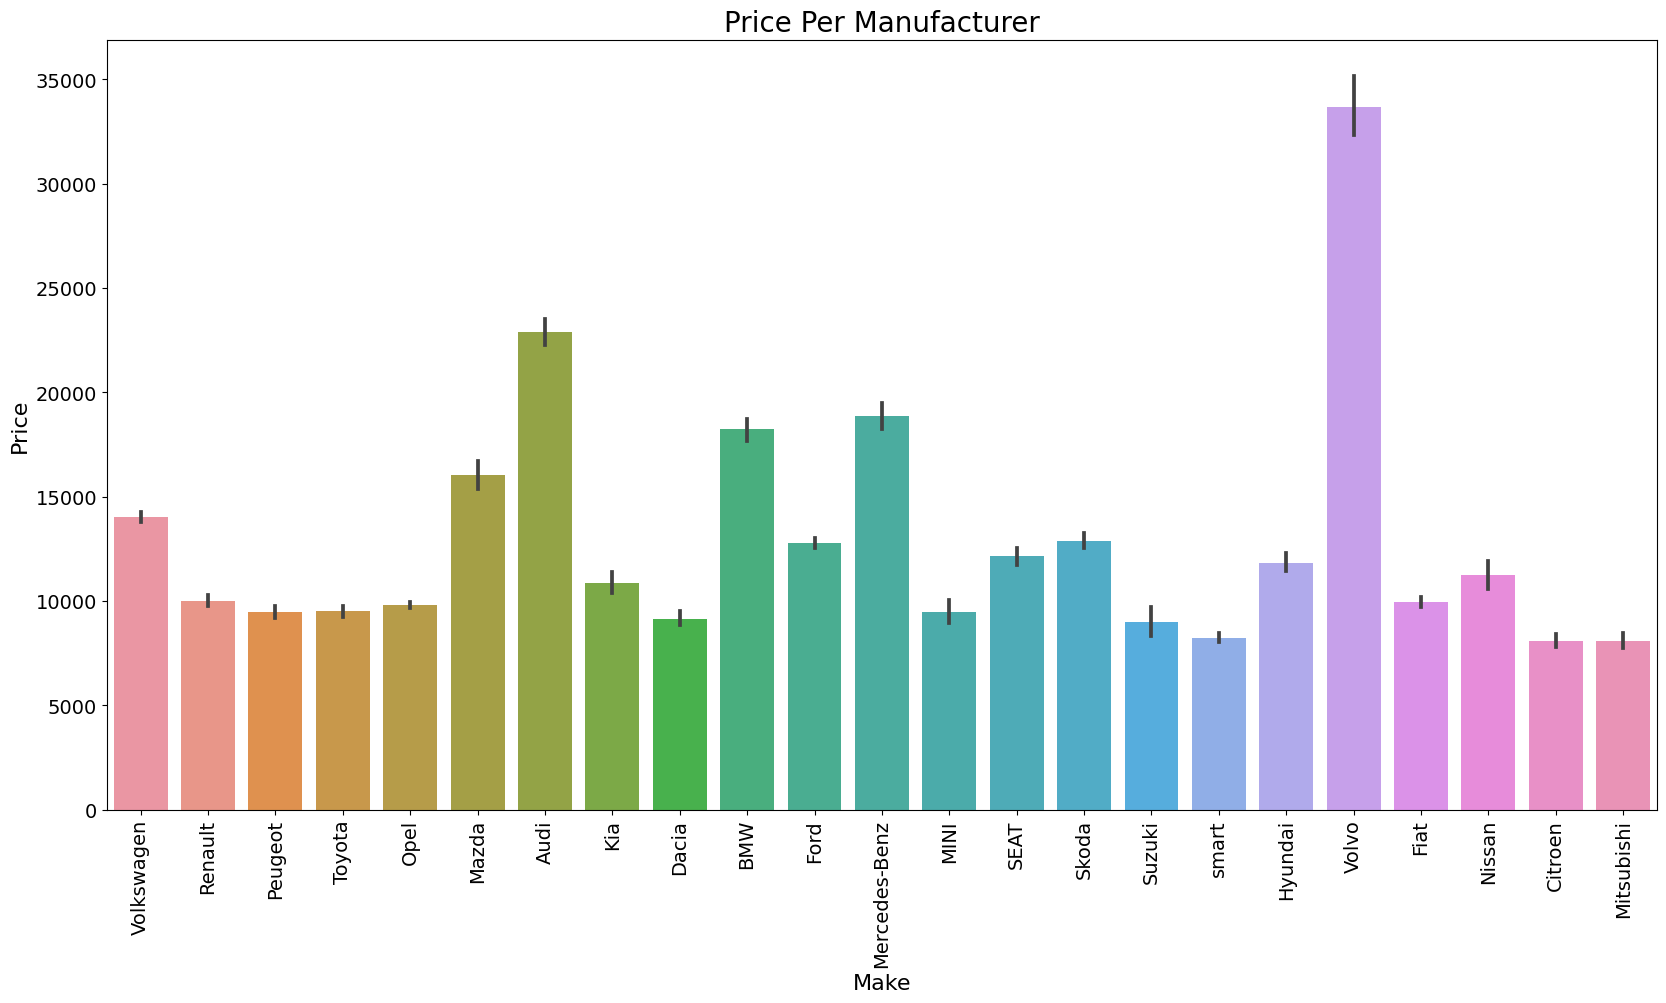

In [35]:
# Set the figure size
plt.figure(figsize=(20,10))

# Draw a barplot using seaborn
sns.barplot(data=df, x=df['make'], y = df['price'])

# Note that we could have achieved the same result using pandas:
#mean_price_per_manuf.plot(kind = 'bar')

# Rotate the tick labels on the x-axis by 90 degrees
plt.xticks(rotation=90)

# Set the labels fonts and font sizes
plt.xlabel('Make', fontsize=16);
plt.ylabel('Price', fontsize=16);
plt.title('Price Per Manufacturer', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

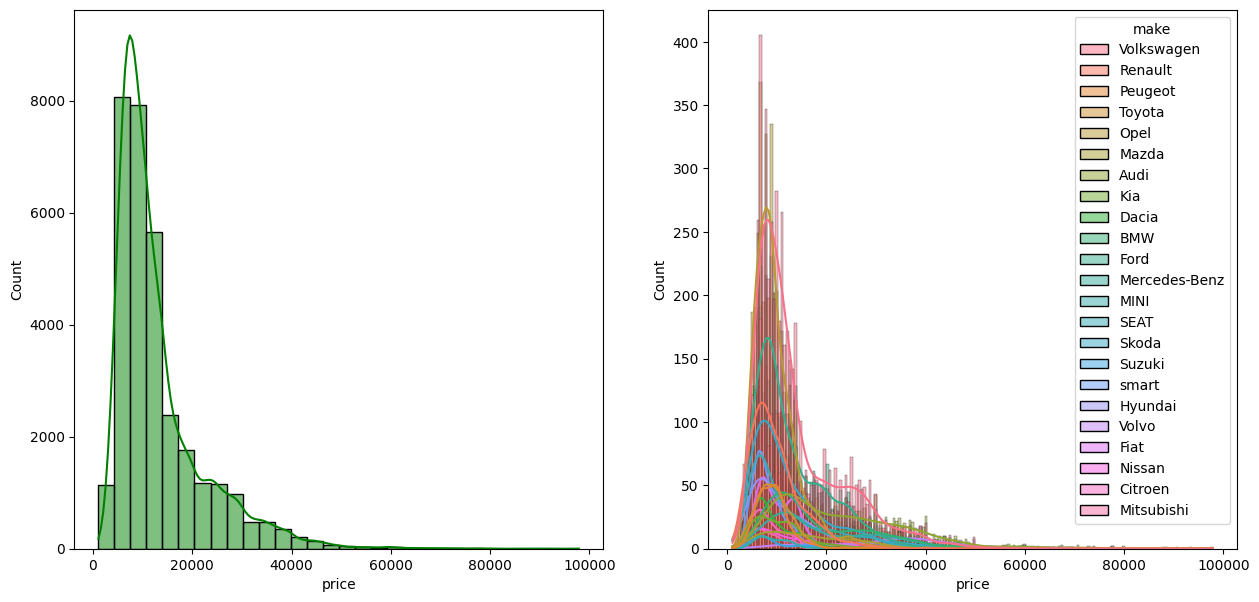

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='make')
plt.show()